### 머신 러닝 기초 (Machine Learning Basics)

* 머신 러닝이 주목받는 이유 : 데이터의 폭증, 컴퓨팅 파워의 발전

- 핵심 용어
  - Feature(특성) : Model의 입력 값 (X), ex)공부 시간 
  - Lable(레이블/정답) : Model의 예측해야 될 값 (y), ex) 취업률
  - Training(학습) : Feature와 Label 데이터를 이용해 Model을 만드는 과정
  - Inference(추론) : 학습된 모델을 사용해 새로운 데이터의 Label을 예측하는 과정
    
- 머신 러닝의 종류 
  - 지도 학습(Supervised Learning) : Lable이 있는 데이터로 학습
    예) 스팸 메일 분류, 주택 가격
  - 비지도 학습(Unsupervised Learning) : Lable이 없는 데이터로 학습 -> 패턴 학습
    예) 마케팅 고객 그룹 분류, 이상 탐지 모델
  - 강화 학습(Reinforcement Learning) : 보상(Reward)을 최대화하는 방향으로 학습
    예) Alpha-Go, 자율주행차

In [113]:
# pip install scikit-learn
# 파이썬에서 가장 널리 쓰이는 머신 러닝 라이브러리
# import sklearn
# print("sklearn 버전 :", sklearn.__version__)

# from sklearn.datasets import load_iris
# iris_dataset = load_iris()

# iris_dataset

In [21]:
# iris 데이터 셋의 키
print(iris_dataset.keys())

# iris 품종
print("품종 : ",iris_dataset["target_names"])

# input 특징
print("특징 이름: ",iris_dataset["feature_names"])

# data의 종류
print("데이터 타입 :", type(iris_dataset["data"]))

# data의 크기
print("데이터 크기(행, 열) :", iris_dataset["data"].shape)

# 첫 5개 데이터
print("첫 5개 데이터 :\n", iris_dataset["data"][:5])

# label
print("Label : \n", iris_dataset["target"])

# lable 데이터 타입
print("Label 데이터 타입 :", type(iris_dataset["target"]))

# label 개수
print("Label : ",iris_dataset["target"].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
품종 :  ['setosa' 'versicolor' 'virginica']
특징 이름:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
데이터 타입 : <class 'numpy.ndarray'>
데이터 크기(행, 열) : (150, 4)
첫 5개 데이터 :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Label : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Label 데이터 타입 : <class 'numpy.ndarray'>
Label :  (150,)


### 데이터 분리
- Train 데이터와 Test 데이터로 나누자
- Why? 모델이 학습 과정 중 외운 정답을 통해 답을 예측하는 것을 방지
- [2.5, 3.1, 4., 0.2] -> 내 모델 -> 예측
- 어? 이거 봤던건데? -> 이거 정답은 0이야
- 우리는 sklearn의 train_test_split 함수 사용

In [117]:
from sklearn.model_selection import train_test_split # train, test 분리

X = iris_dataset.data
y = iris_dataset.target

# train, test의 비율을 75 : 25 비율로 분할
# scatter 산점도 -> 랜덤 데이터인데 시드를 설정하면 같은 결과가 나옴
# (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

print("X_train의 크기 : ", X_train.shape)
print("X_test의 크기 : ", X_test.shape)
print("y_train의 크기 : ", y_train.shape)
print("y_test의 크기 : ", y_test.shape)

print("학습용 데이터의 일부 : \n", X_train[:3])

X_train의 크기 :  (112, 4)
X_test의 크기 :  (38, 4)
y_train의 크기 :  (112,)
y_test의 크기 :  (38,)
학습용 데이터의 일부 : 
 [[6.4 2.8 5.6 2.2]
 [6.1 2.8 4.7 1.2]
 [4.7 3.2 1.6 0.2]]


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

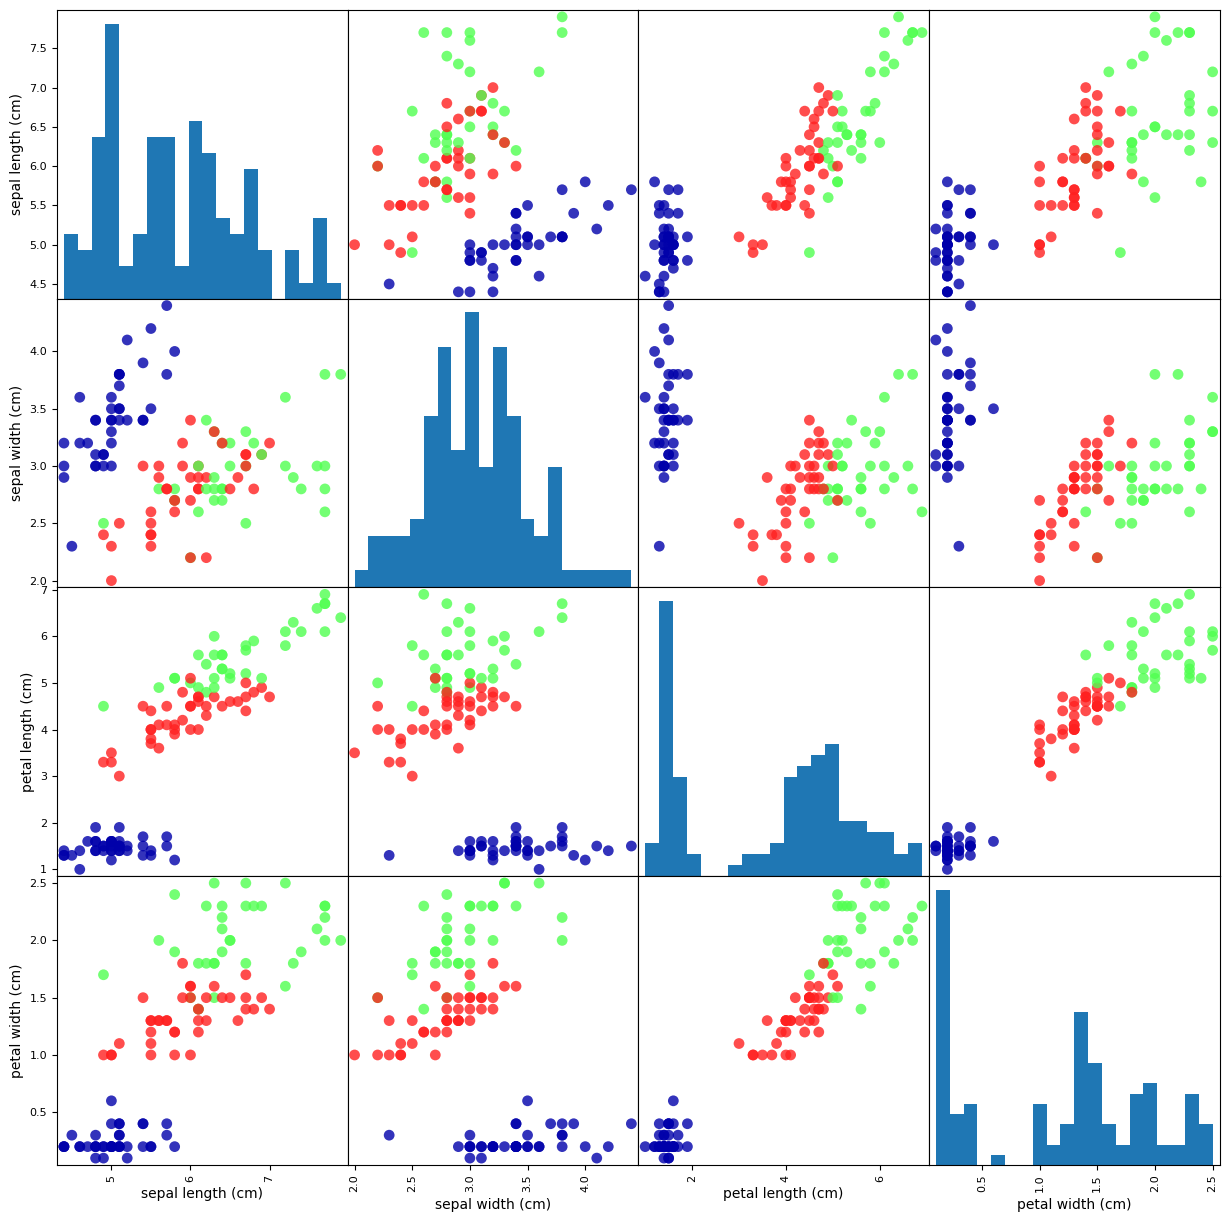

In [118]:
# 1) input과 lable을 통해 머신 러닝 없이도 해결할 수 있는 문제인가?

# input label
#   1     3
#   2     5
#   3     7
# y = 2X + 1

# 2) 산점도 시각화 사용해서 실제로 분류할 수 있는가? 확인
import pandas as pd

# X_train 활용 df 만들기
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.describe()

# 혹시나 X_test, y_test는 사용하면 안됨 (평가할 때만 사용)

# !pip install mglearn
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker="o",
                          hist_kwds={"bins":20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [78]:
# 첫 번째 머신 러닝 모델 선정 (KNN)
# K-최근접-이웃 (K-Nearest Neighbors)
# 가장 직관적인 머신 러닝 모델
# 나는 누구인가? -> 내 이웃을 보고 결정하자
# K가 중요하다
# 모델 -> (K = 3, 정확도 70%, K = 5, 정확도 75%, K = 7, 정확도 73%)
# K 값을 조정하는 과정 -> parameter tuning 한다
# K : Hyper parameter


In [103]:

from sklearn.neighbors import KNeighborsClassifier

# 모델 객체 생성 (K = 1) (나중에 다른 값으로 조정해보자)
knn = KNeighborsClassifier(n_neighbors=1)

# 모델 학습 : fit
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [105]:
# 학습된 결과를 바탕으로 평가
# y_test
# X_test -> knn -> y_pred
# y_pred와 y_test 값을 비교해서
# 정확도(accurancy)를 확인

y_pred = knn.predict(X_test)
print("우리가 만든 모델로 예측한 결과 : \n", y_pred)
print("실제 Label : \n", y_test)

# y_pred, y_test 간의 정확도 측정 함수
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"예측 모델 정확도 : {accuracy * 100:.2f}%")

우리가 만든 모델로 예측한 결과 : 
 [1 0 2 2 0 1 0 2 2 2 0 2 2 0 0 2 1 2 2 2 1 0 2 2 0 1 2 1 0 1 0 2 1 0 2 2 1
 1]
실제 Label : 
 [1 0 2 2 0 1 0 2 2 2 0 2 2 0 0 2 1 2 2 2 1 0 2 1 0 1 2 1 0 1 0 2 1 0 2 2 1
 1]
예측 모델 정확도 : 97.37%


In [110]:
# K값에 따라 정확도 변화를 확인해보자

k_list = range(1, 30, 2)
accuracies = []

for k in k_list:
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn_test.predict(X_test))
    accuracies.append(round(acc,3))

print(accuracies)

[0.974, 0.974, 0.974, 0.947, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974]


In [111]:
# 모델의 성능
# 과소적합(Underfitting) : 모델이 너무 단순해서 데이터의 패턴을 제대로 파악하지 못함
#                        -> 학습 성능 낮다, 테스트 성능 낮다
# 과적합(Overfitting) : 모델이 Train 데이터에 너무 의존하여서,
#                      새로운 데이터에 대해 제대로 예측하지 못하는 경우
#                        -> 학습 성능 높다, 테스트 성능 낮다
# 일반화(Generalization) : 모델이 학습뿐만 앙니라 새로운 데이터에 대한 정답도 잘 도출
#                        -> 이상적인 목표

# 과소적합/과적합 어떻게 확인 ?
# 학습 데이터셋, 테스트 데이터셋 간의 성능 차이 확인

# 해결법 ?
# 과소적합 -> 더 복잡한 모델 사용, Feature 추가 (ex)차량 색깔 column추가)
# 과적합 -> 더 많은 데이터 확보, Feature 제한(Regularization), 교차 검증(Cross-Validation)

In [112]:
# 지도학습 선택
# input, label
# 정답이 있으니까 지도 학습 해야지
# 분류 or 회귀

# 분류(Classification)
# 붓꽃의 3품종에 관한 분류 -> 다중 분류(class가 여러개다)
# 스팸 메일? 아니야? -> 이진 분류
# label이 이산적인 값

# 회귀(Regression)
# 연속적인 값을 예측
# label 값이 연속적인 값

In [113]:
# 2번째 분류 알고리즘
# 의사 결정 트리 (Decision Tree)
# 원리 : Feature에 대한 '질문'을 통해 데이터를 분류
# 핵심 개념
# - 불순도(Impurity) : 한 노드에 여러 클래스의 데이터가 섞여 있다 얼마나 섞여 있는지에 관한 척도
# -- 지니 불순도 (Gini Impurity) : 클래스가 섞여 있지 않을 수록 0.55
# -- 10개의 공이 들어 있는 상자에 (5개 Red, 5개 Blue) -> 2개 꺼냈을 때 다를 확률
# -- 엔트로피(Entropy) : 지니 불순도와 비슷한 개념 (얼마나 클래스들이 안정되어 있는지)
# - 정보 획득(Information Gain) : 특정 질문을 통해 데이터를 나누었을 때,
#                                불순도가 얼마나 감소하는지를 측정

# 의사 결정 트리 : 정보 획득이 최대가 되는 방향으로 학습 된다.

# [장점] 
# 1) 어떤 규칙에 의거해서 분류하는지 눈으로 보기 명확
# 2) 사람의 언어로 설명하기 용이
# 3) 시각화하기 쉽다
# 4) 전처리가 쉽다 (데이터 스케일에 영향을 덜 받는다)

# [단점]
# 1) 과적합될 확률이 굉장히 높다 :
#    학습한 데이터에 대해서 잘 맞추지만 실제 데이터에 대한 예측은 낮을 수 있다
# 2) 랜덤하게 나눈 train data가 변하면 의사결정 모델이 급격히 변화한다

# 과적합을 방지하기 위해
# depth 제한, 노드에 들어가는 최소 데이터 수를 제한

In [18]:
# 의사 결정 트리 활용한 와인 데이터 분류
from sklearn.datasets import load_wine # wine 데이터 로드
from sklearn.model_selection import train_test_split # 데이터 분할 train : test = 0.75 : 0.25
from sklearn.tree import DecisionTreeClassifier# max_depth : 과적합(overfitting)을 방지하기 위한 파라미터
from sklearn.metrics import accuracy_score # 학습된 결과를 통해 평가

wine = load_wine() # wine 데이터 로드

X = wine.data
y = wine.target

# 데이터 분할 train : test = 0.75 : 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# max_depth : 과적합(overfitting)을 방지하기 위한 파라미터
d_tree = DecisionTreeClassifier(max_depth=3, random_state=6)
d_tree.fit(X_train, y_train)

# 학습된 결과를 통해 평가

y_pred = d_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 : {accuracy:.4f}")

정확도 : 0.9556


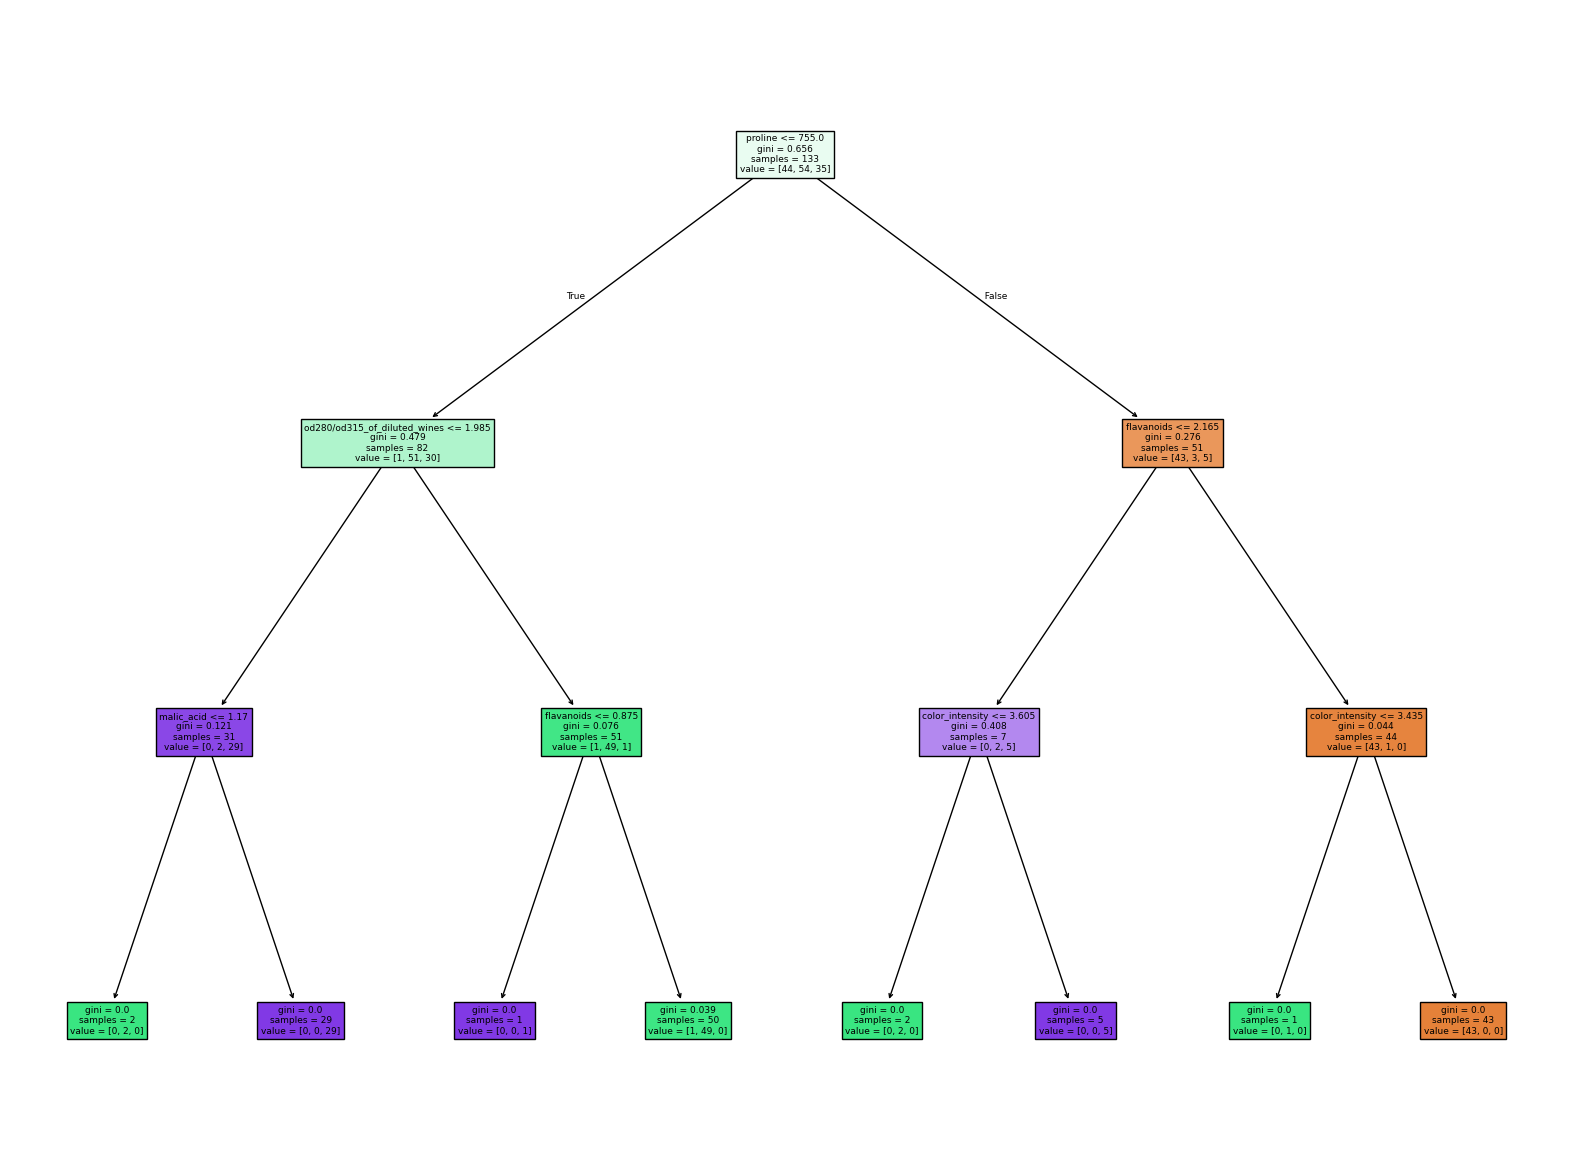

In [31]:
# 의사 결정 트리 모델 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(d_tree, filled=True, feature_names=wine.feature_names)
plt.show()

In [141]:
# 어떤 feature가 가장 영향을 미쳤는가
feature_importances = d_tree.feature_importances_
df_wine = pd.DataFrame({"feture" : wine.feature_names, "importances" : feature_importances})
df_wine

,feture,importances
0,alcohol,0.000000
1,malic_acid,0.043843
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.131099
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.056377


In [19]:
# 유방암 데이터를 의사 결정 모델로 분류해보자

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
print(cancer.data.shape)

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape

tree = DecisionTreeClassifier(max_depth = 3, random_state=0)
tree.fit(X_train,y_train)

# 의사 결정 나무 안에 정확도 측정 함수
# 모델을 다 만든 후
# 학습했었던 X, y를 넣어보자
print(f"훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}")

# 정확도 측정
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 : {accuracy:.3f}")

(569, 30)
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.958
정확도 : 0.958


In [15]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

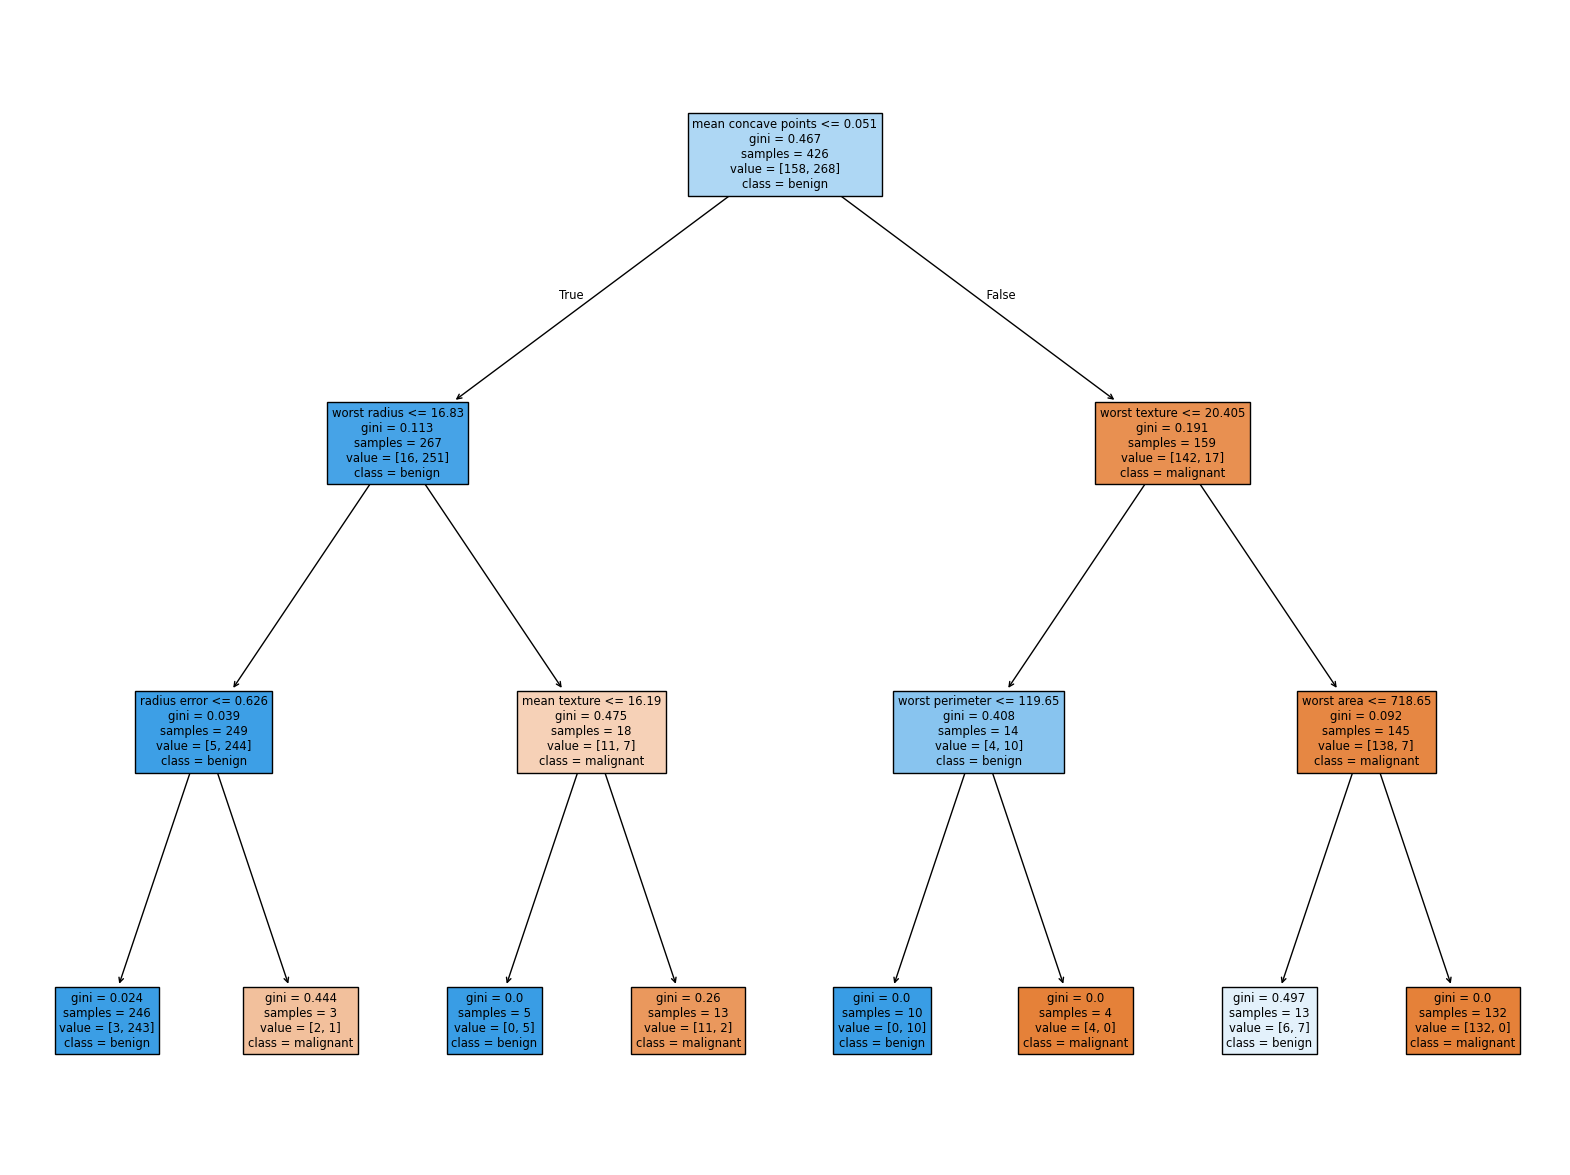

In [30]:
# 유방암 모델 의사 결정 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.show()


In [11]:
!pip install graphviz

In [29]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

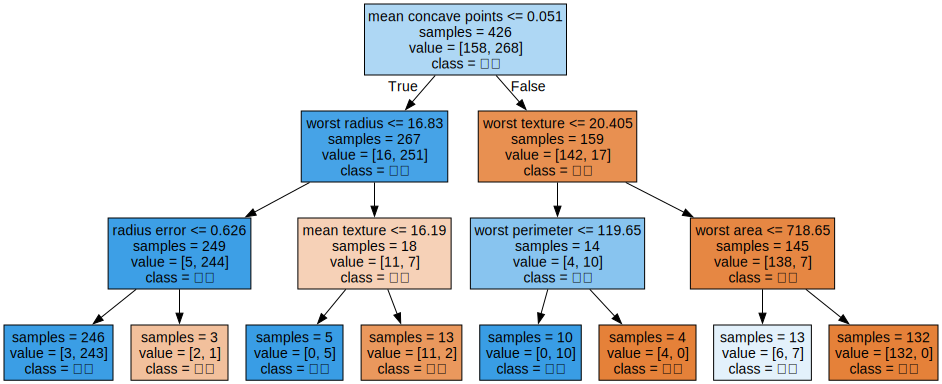

In [12]:
import graphviz

with open("tree.dot", "r", encoding="UTF-8") as file:
    dot_graph = file.read()
    
display(graphviz.Source(dot_graph))

In [32]:
# SVM (Support Vector Machine)
# 각 클래스의 데이터를 가장 잘 구분하는 경계선(Decision Boundary)을 찾는 알고리즘
# 핵심 개념
# - 마진(Margin) : 결정 경계와 가장 가까운 각 클래스의 데이터 샘플(서포트 벡터) 사이의 거리
# - 서포트 벡터(Support Vector) : 결정 경계를 정의하는 데 집적적인 영향을 주는 데이터
# 특징 : 분류 문제에서 굉장히 강력한 성능

In [37]:
# 붓꽃(iris)데이터를 활용한 SVM 모델 기반 학습
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # 전처리 위한 클래스

from sklearn.svm import SVC

iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

# 스케일링 (feature간 범위의 폭을 일정하게 조절)
# 학습하기 전에 조절한 적이 처음 (전처리)

scaler = StandardScaler()

# X_train
# feature가 3개다, -1 ~ 0 ~ 1 사이 표준편차 : 1
X_train_scaled = scaler.fit_transform(X_train) # X_train을 살피면서 평균과 표준편차 등을 학습
X_test_scaled = scaler.transform(X_test) # 학습된 평균, 표준편차 등을 토대로 X_test를 스케일링

# kernel="rbf" : 비선형 데이터에 사용 되는 커널
# C : 규제 파라미터

svm = SVC(kernel="rbf", C=1.0, random_state=37)
svm.fit(X_train_scaled, y_train)

SVC(random_state=37)

In [39]:
# 정확도 평가
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy:.4f}")

정확도 : 1.0000


정확도 : 0.9737


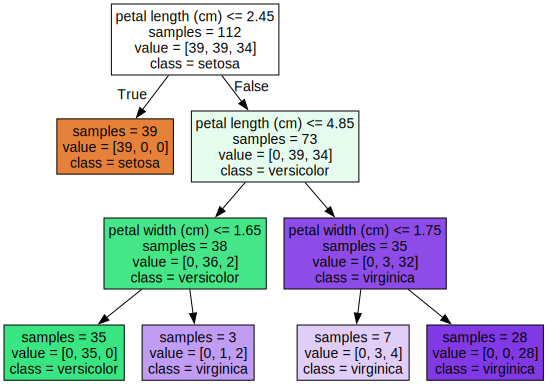

In [59]:
# iris 데이터를 의사 결정 나무 (desicion tree)로 학습!!
# "iris.dot" export 후 graphviz로 시각화!!
# 여러분들은 하실 수 있습니다 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz

# 1. iris 데이터 로드
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
# 2. train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)
# 3. 의사결정나무 모델 학습(fit)
iris_tree = DecisionTreeClassifier(max_depth=3, random_state=37)
iris_tree.fit(X_train, y_train)
# 4. 예측 값과 테스트 label 비교 -> 정확도 측정!!
y_pred = iris_tree.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy:.4f}")
# 5. export_graphviz 함수 사용해서 "iris.dot" export

export_graphviz(iris_tree, feature_names=iris_dataset.feature_names,
                class_names=iris_dataset.target_names, out_file="iris.dot",
               impurity=False, filled=True)

with open("iris.dot", "r", encoding="UTF-8") as file:
    dot_graph = file.read()
    
# 6. graphviz 시각화
display(graphviz.Source(dot_graph))

In [60]:
print(iris_dataset)

print(X_train.shape)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [61]:
# 지도 학습
# 회귀(Regression)
# 선형 회귀(Linear Regression)
# : 데이터에 가장 잘 맞는 '직선'을 찾는 알고리즘 (독립 변수 X와 종속 변수 y의 선형 관계)
# 기본 모델 : y = Wx + b (W: 가중치, b: 절편)
# 실제 y_test값과 input을 통해 얻은 y (wx + b)
# 의 평균 제곱 오차 사용(Mean Squared Error, MSE)
# 해당 함수 -> 비용 함수 (Cost Function) : 실제 값과 예측 값의 오차를 측정하는 함수

# 어떤 방식으로 W와 b를 수정해 나갈 것이냐?
# : 가장 많이 사용 : 경사 하강법 (Gradient Descent)

In [95]:
from sklearn.datasets import make_regression # 실습용 선형회귀 만드는 함수
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# 실습형 선형 회귀 데이터 생성
X, y = make_regression(n_samples=1000, n_features=8, noise=8, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 학습 모델
linear_regress = LinearRegression()
linear_regress.fit(X_train,y_train)

# 예측 결과

y_pred = linear_regress.predict(X_test)

# Cost Funtion : MSE
# mae
mae = mean_absolute_error(y_test, y_pred)
# mse
mse = mean_squared_error(y_test, y_pred)
# rmse
rmse = root_mean_squared_error(y_test, y_pred)
# r2
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

# rmse : mse에 root를 씌운다
import numpy as np
rmse = np.sqrt(mse)

# 가중치(W)와 y절편(b)를 구해보자
print("가중치 W :",linear_regress.coef_)
print("y절편 b :",linear_regress.intercept_)



mae : 6.44638573343759
mse : 65.76339570161906
rmse : 8.109463342393198
r2 : 0.99788975576639
가중치 W : [78.14692263 62.78144546 77.66782721 39.96899843 51.36287689 46.71165384
 91.85979152  3.08268101]
y절편 b : 0.297757718195951


In [94]:
from sklearn.datasets import make_regression # 실습용 선형회귀 만드는 함수
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
from sklearn.datasets import load_diabetes

# 실습형 선형 회귀 데이터 생성
X, y = load_diabetes(return_X_y=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 학습 모델
linear_regress = LinearRegression()
linear_regress.fit(X_train,y_train)

# 예측 결과

y_pred = linear_regress.predict(X_test)

# Cost Funtion : MSE
# mae
mae = mean_absolute_error(y_test, y_pred)
# mse
mse = mean_squared_error(y_test, y_pred)
# rmse
rmse = root_mean_squared_error(y_test, y_pred)
# r2
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

# rmse : mse에 root를 씌운다
rmse = np.sqrt(mse)

# 가중치(W)와 y절편(b)를 구해보자
print("가중치 W :",linear_regress.coef_)
print("y절편 b :",linear_regress.intercept_)

mae : 41.54850685988059
mse : 2848.3106508475043
rmse : 53.36956671032195
r2 : 0.4849058889476757
가중치 W : [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
y절편 b : 151.6651755919933


In [84]:
# 보스턴 주택 가격 예측

import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


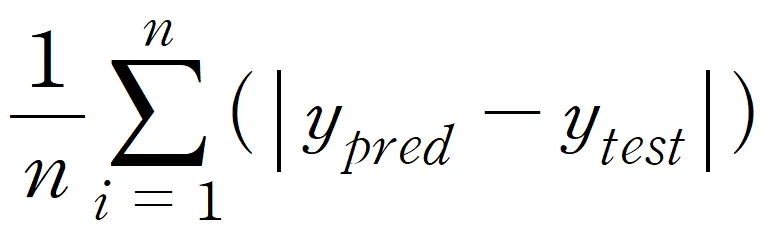

# 회귀의 평가지표
# 연속적인 데이터이므로 '수치의 차이'를 통해 평가한다
# W, b -> y_pred
# 원래 y_test
# 의 차이가 작을수록 좋은 모델이다

# 오차의 차이만 가지고 진행 -> +-가 상쇄
# 절댓값, 제곱 -> 양의 범위에서 처리

# 1) MAE(Mean Absolute Error) : 절대값 차이 평균
$$ \frac{1}{n} \sum_{i=1}^{n} (|y_{pred} - y_{test}|) $$
# 2) MSE(Mean Squared Error) : 제곱 차이 평균
# -> MAE 대비 멀리 떨어질수록 패널티
# 3) RMSE(Root Mean Squared Error) : MSE에 루트를 씌워 실제 값과 단위를 맞춤
# 4) R^2 (결정 계수, Coefficient of Determination)
# : 모델이 데이터의 분산을 얼마나 잘 설명하는지에 관해서 나타내는 지표
# : 1에 가까울수록 좋은 모델이다.

* 이론:
    * 회귀 모델은 연속적인 값을 예측하므로, 실제 값과 예측 값의 '차이'를 기반으로 평가.
    * MAE (Mean Absolute Error): $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$ (오차 절대값의 평균)
    * MSE (Mean Squared Error): $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$ (오차 제곱의 평균, 큰 오차에 패널티 부여)
    * RMSE (Root Mean Squared Error): $RMSE = \sqrt{MSE}$ (MSE에 루트를 씌워 실제 값과 단위를 맞춤)
    * R² (결정 계수, Coefficient of Determination): $R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y}_i)^2}$
        * 모델이 데이터의 분산을 얼마나 잘 설명하는지를 나타냄. 1에 가까울수록 좋음.

In [93]:
from sklearn.datasets import make_regression # 실습용 선형회귀 만드는 함수
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 학습 모델
linear_regress = LinearRegression()
linear_regress.fit(X_train, y_train)

# 예측 결과
y_pred = linear_regress.predict(X_test)

# 평가 지표
# mae
mae = mean_absolute_error(y_test, y_pred)
# mse
mse = mean_squared_error(y_test, y_pred)
# rmse
rmse = root_mean_squared_error(y_test, y_pred)
# r2
r2 = r2_score(y_test, y_pred)

print(f"mae : {mae}")
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")
print()
# 가중치(W)와 y절편(b)를 구해보자
print("가중치 W :", linear_regress.coef_)
print("y절편 b :", linear_regress.intercept_)


mae : 41.54850685988059
mse : 2848.3106508475043
rmse : 53.36956671032195
r2 : 0.4849058889476757

가중치 W : [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
y절편 b : 151.6651755919933


In [108]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.keys())
print(iris_dataset["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

In [112]:
# 분류 모델을 활용하여 AND GATE를 구현해보자

import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

print(knn.predict([[0,0]]))
print(knn.predict([[0,1]]))
print(knn.predict([[1,0]]))
print(knn.predict([[1,1]]))


[0]
[0]
[0]
[1]
